<a href="https://colab.research.google.com/github/FranciscoAlveJr/Mercado-de-games/blob/main/Mercado_de_Games.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Mercado do Games
Uma análise de vendas de games para PS4, compreendidos no período de 2013-2018 <br>
Os dados foram obtidos no site Kaggle

Link do Dataset: https://www.kaggle.com/datasets/sidtwr/videogames-sales-dataset

## Importando bibliotecas

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Importando o banco de dados do dataset

In [4]:
df = pd.read_csv('PS4_GamesSales.csv', encoding='latin-1')
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [5]:
df.shape

(1034, 9)

Neste momento, a tabela possui um total de 9 colunas e 1034 linhas

In [6]:
df.columns

Index(['Game', 'Year', 'Genre', 'Publisher', 'North America', 'Europe',
       'Japan', 'Rest of World', 'Global'],
      dtype='object')

## Verificando se existem valores nulos

In [7]:
df.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

Foram encontrados 209 valores nulos

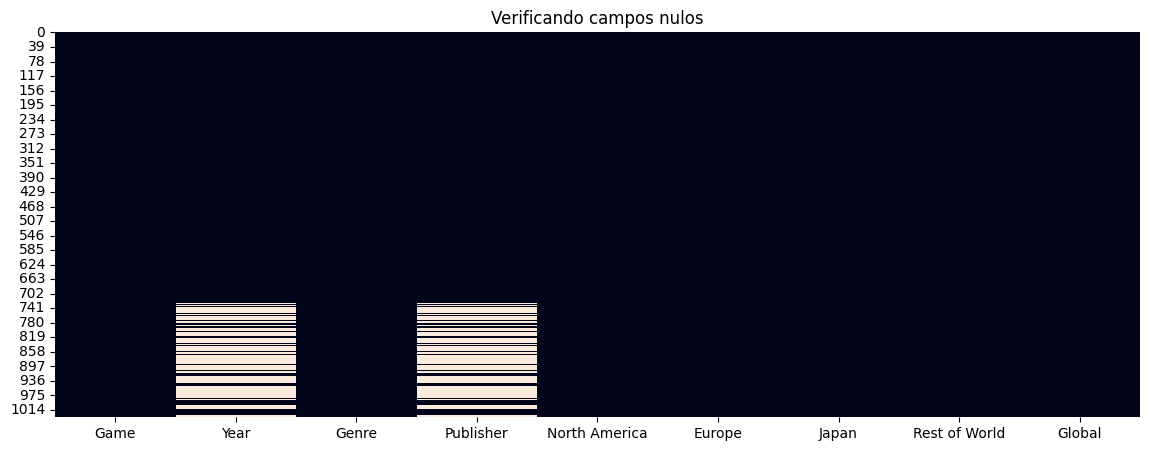

In [8]:
plt.figure(figsize=(14, 5))
plt.title('Verificando campos nulos')
sns.heatmap(df.isnull(), cbar=False);

## Removendo os valores nulos

In [9]:
df.dropna(inplace=True)
df

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
...,...,...,...,...,...,...,...,...,...
1025,Biomutant,2019.0,Action,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1026,de Blob,2017.0,Platform,THQ Nordic,0.00,0.00,0.00,0.00,0.00
1027,Chaos on Deponia,2017.0,Adventure,Daedalic Entertainment,0.00,0.00,0.00,0.00,0.00
1028,Code Vein,2018.0,Action,Bandai Namco Entertainment,0.00,0.00,0.00,0.00,0.00


In [10]:
df.shape

(825, 9)

Observa-se que agora a tabela possui 825 linhas, após a remoção dos valores nulos

In [11]:
df.describe()

,Year,North America,Europe,Japan,Rest of World,Global
count,825.000000,825.000000,825.000000,825.000000,825.000000,825.000000
mean,2015.966061,0.256448,0.311600,0.042048,0.111552,0.721721
std,1.298360,0.620259,0.868271,0.119814,0.274713,1.743122
min,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.000000,0.000000,0.000000,0.000000,0.000000,0.030000
50%,2016.000000,0.050000,0.020000,0.000000,0.020000,0.120000
75%,2017.000000,0.190000,0.220000,0.040000,0.090000,0.560000
max,2020.000000,6.180000,9.710000,2.170000,3.020000,19.390000


In [12]:
df.describe(exclude=np.number)

,Game,Genre,Publisher
count,825,825,825
unique,824,17,152
top,Biomutant,Action,Namco Bandai Games
freq,2,205,56


In [13]:
df['Game'].nunique()

824

In [14]:
df = df.loc[(df['Year'] != 2019) & (df['Year'] != 2020)]
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


## Convertendo os anos de decimal para inteiro

In [15]:
df['Year']

0       2014.0
1       2015.0
2       2018.0
3       2017.0
4       2017.0
         ...  
1024    2018.0
1026    2017.0
1027    2017.0
1028    2018.0
1030    2017.0
Name: Year, Length: 805, dtype: float64

In [16]:
df = df.astype({'Year': int})
df['Year']

0       2014
1       2015
2       2018
3       2017
4       2017
        ... 
1024    2018
1026    2017
1027    2017
1028    2018
1030    2017
Name: Year, Length: 805, dtype: int64

## Verificando Vendas Globais

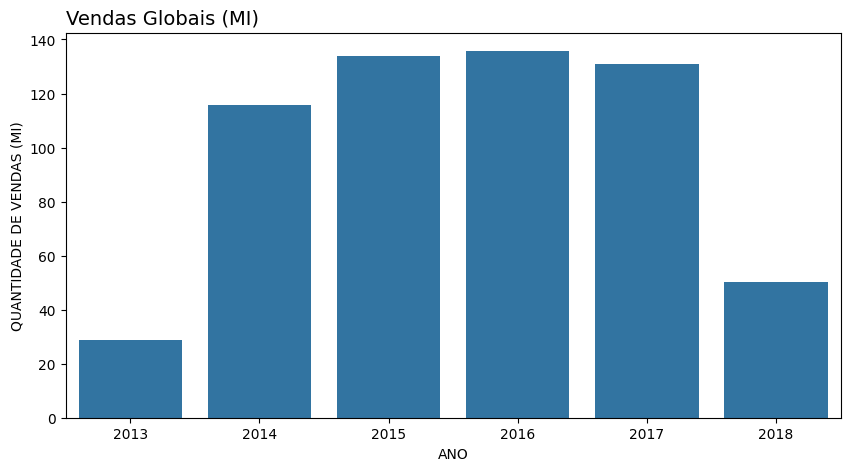

In [17]:
plt.figure(figsize=(10, 5))
plt.title('Vendas Globais (MI)', loc='left', fontsize=14)
sns.barplot(data=df, x='Year', y='Global', ci=None, estimator=sum)
plt.ylabel('QUANTIDADE DE VENDAS (MI)')
plt.xlabel('ANO');

In [18]:
print('Os jogos que venderam mais de 10 milhões de cópias.')
df.loc[df['Global']>=10]

Os jogos que venderam mais de 10 milhões de cópias.


,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80
5,FIFA 17,2016,Sports,Electronic Arts,1.26,7.95,0.12,1.61,10.94
6,Uncharted (PS4),2016,Action,Sony Interactive Entertainment,4.49,3.93,0.21,1.70,10.33


In [48]:
analise = df.groupby(by=['Year']).sum().reset_index()

america = [america/total * 100 for america, total in zip(analise['North America'], analise['Global'])]
europa = [europa/total * 100 for europa, total in zip(analise['Europe'], analise['Global'])]
japao = [japao/total * 100 for japao, total in zip(analise['Japan'], analise['Global'])]
mundo = [mundo/total * 100 for mundo, total in zip(analise['Rest of World'], analise['Global'])]

america

[35.9874826147427,
 34.35476909797151,
 37.01768788715576,
 34.92484526967286,
 34.20168067226891,
 39.14342629482071]

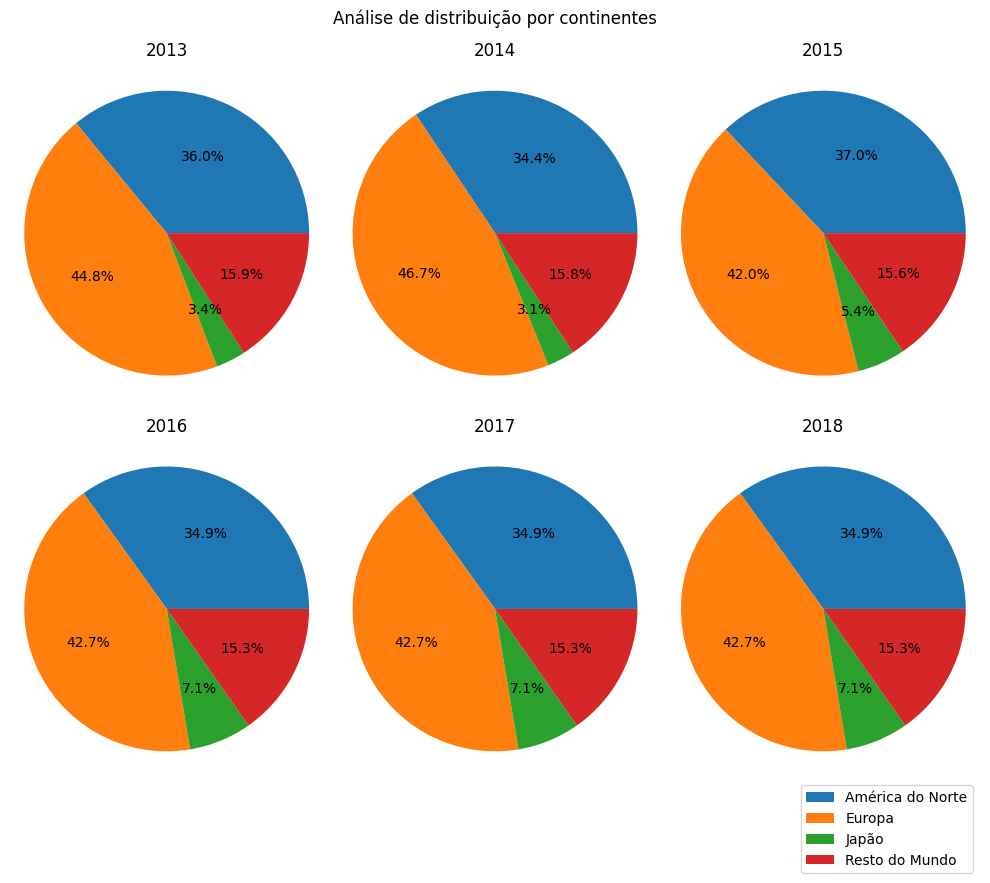

In [116]:
labels = 'América do Norte', 'Europa', 'Japão', 'Resto do Mundo'

sizes1 = [america[0], europa[0], japao[0], mundo[0]]
sizes2 = [america[1], europa[1], japao[1], mundo[1]]
sizes3 = [america[2], europa[2], japao[2], mundo[2]]
sizes4 = [america[3], europa[3], japao[3], mundo[3]]
sizes5 = [america[3], europa[3], japao[3], mundo[3]]
sizes6 = [america[3], europa[3], japao[3], mundo[3]]

fig, axes = plt.subplots(2, 3, figsize=(10, 8))
plt.suptitle('Análise de distribuição por continentes')


axes[0, 0].pie(sizes1, autopct='%1.1f%%')
axes[0, 0].axis('equal')
axes[0, 0].set_title('2013')

axes[0, 1].pie(sizes2, autopct='%1.1f%%')
axes[0, 1].axis('equal')
axes[0, 1].set_title('2014')

axes[0, 2].pie(sizes3, autopct='%1.1f%%')
axes[0, 2].axis('equal')
axes[0, 2].set_title('2015')

axes[1, 0].pie(sizes4, autopct='%1.1f%%')
axes[1, 0].axis('equal')
axes[1, 0].set_title('2016')

axes[1, 1].pie(sizes5, autopct='%1.1f%%')
axes[1, 1].axis('equal')
axes[1, 1].set_title('2017')

axes[1, 2].pie(sizes6, autopct='%1.1f%%')
axes[1, 2].axis('equal')
axes[1, 2].set_title('2018')

plt.tight_layout()
plt.legend(labels, bbox_to_anchor=(1, 0))
plt.show()

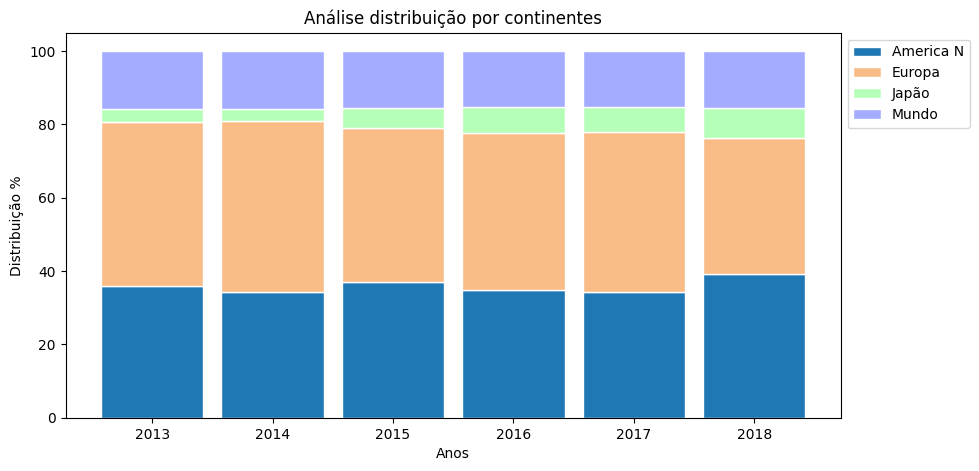

In [20]:
plt.figure(figsize=(10, 5))

largura_barra = 0.85
rotulos = analise['Year']
grupos = [0, 1, 2, 3, 4, 5]

plt.title('Análise distribuição por continentes')

# América
plt.bar(grupos, america, width=largura_barra, edgecolor='white')

# Europa
plt.bar(grupos, europa, bottom=america, width=largura_barra, color='#f9bc86', edgecolor='white')

# Japão
plt.bar(grupos, japao, bottom=[a+b for a, b in zip(america, europa)], width=largura_barra, color='#b5ffb9', edgecolor='white')

# Resto do Mundo
plt.bar(grupos, mundo, bottom=[a+b+c for a, b, c in zip(america, europa, japao)], width=largura_barra, color='#a3acff', edgecolor='white')

plt.xticks(grupos, rotulos)
plt.xlabel('Anos')
plt.ylabel('Distribuição %')

# Legenda
plt.legend(['America N', 'Europa', 'Japão', 'Mundo'], loc='upper left', bbox_to_anchor=(1, 1));

Aqui é possível ver um certo equilíbrio nas vendas na América do Norte e Europa. Sendo o segundo, levemente maior.

In [21]:
paleta_cores = sns.color_palette('husl', 20)

## Analisando as Desenvolvedoras de Jogos

In [22]:
publi = df.groupby(by=['Publisher']).sum().reset_index()
top_publi = publi[['Publisher', 'Global']].sort_values(by='Global', ascending=False, ignore_index=True)
print('Top 10 Desenvolvedoras que mais venderam no PS4 (2013-2018)')
top_publi.head(10)

Top 10 Desenvolvedoras que mais venderam no PS4 (2013-2018)


,Publisher,Global
0,Activision,72.44
1,Ubisoft,59.16
2,Electronic Arts,54.96
3,Sony Interactive Entertainment,54.85
4,EA Sports,47.55
5,Sony Computer Entertainment,42.26
6,Rockstar Games,33.93
7,Square Enix,29.92
8,Bethesda Softworks,28.96
9,Warner Bros. Interactive Entertainment,27.83


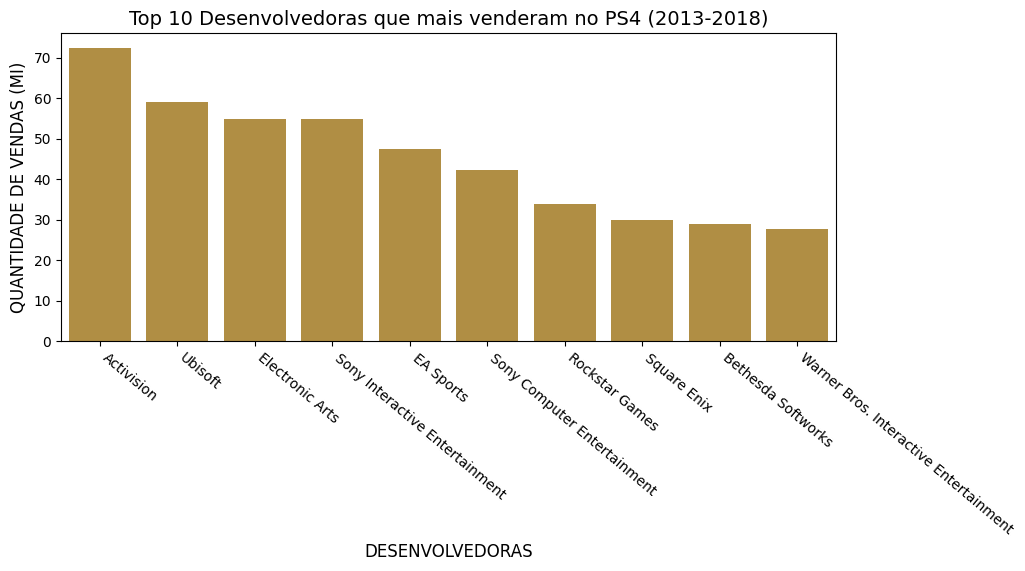

In [23]:
top_dez = top_publi.head(10)
plt.figure(figsize=(10, 4))
plt.title('Top 10 Desenvolvedoras que mais venderam no PS4 (2013-2018)', fontsize=14)
sns.barplot(data=top_dez, x='Publisher', y='Global', estimator=sum, color=paleta_cores[3])
plt.ylabel('QUANTIDADE DE VENDAS (MI)', fontsize=12)
plt.xlabel('DESENVOLVEDORAS', fontsize=12)
plt.xticks(rotation=320, ha='left');

## Analisando os Gêneros de Jogos

In [24]:
genre = df.groupby(by=['Genre']).sum().reset_index()
top_genre = genre[['Genre', 'Global']].sort_values(by='Global', ascending=False, ignore_index=True)
print('Top 10 gêneros mais vendidos no PS4 (2013-2018)')
top_genre.head(10)

Top 10 gêneros mais vendidos no PS4 (2013-2018)


,Genre,Global
0,Action,136.82
1,Shooter,134.99
2,Sports,92.85
3,Role-Playing,62.73
4,Action-Adventure,61.86
5,Racing,25.29
6,Fighting,19.36
7,Platform,17.85
8,Adventure,15.22
9,Misc,12.47


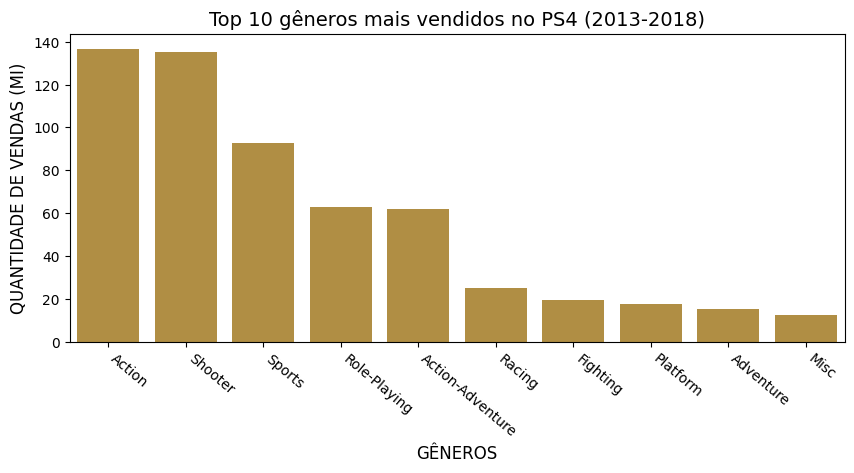

In [25]:
top_dez = top_genre.head(10)
plt.figure(figsize=(10, 4))
plt.title('Top 10 gêneros mais vendidos no PS4 (2013-2018)', fontsize=14)
sns.barplot(data=top_dez, x='Genre', y='Global', estimator=sum, color=paleta_cores[3])
plt.ylabel('QUANTIDADE DE VENDAS (MI)', fontsize=12)
plt.xlabel('GÊNEROS', fontsize=12)
plt.xticks(rotation=320, ha='left');

## Os 10 jogos mais vendidos

In [26]:
top_global = df[['Game', 'Global']].sort_values(by='Global', ascending=False)
print('Top 10 jogos mais vendidos para PS4 no mundo (2013-2018)')
top_global.head(10)

Top 10 jogos mais vendidos para PS4 no mundo (2013-2018)


,Game,Global
0,Grand Theft Auto V,19.39
1,Call of Duty: Black Ops 3,15.09
2,Red Dead Redemption 2,13.94
3,Call of Duty: WWII,13.40
4,FIFA 18,11.80
5,FIFA 17,10.94
6,Uncharted (PS4),10.33
7,Spider-Man (PS4),8.76
8,Call of Duty: Infinite Warfare,8.48
9,Fallout 4,8.48


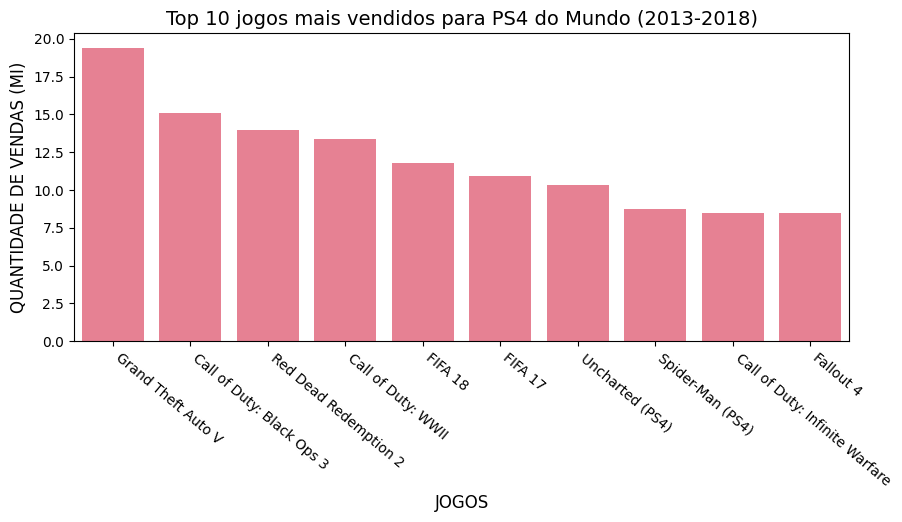

In [27]:
top_dez = top_global.head(10)
plt.figure(figsize=(10, 4))
plt.title('Top 10 jogos mais vendidos para PS4 do Mundo (2013-2018)', fontsize=14)
sns.barplot(data=top_dez, x='Game', y='Global', estimator=sum, color=paleta_cores[0])
plt.ylabel('QUANTIDADE DE VENDAS (MI)', fontsize=12)
plt.xlabel('JOGOS', fontsize=12)
plt.xticks(rotation=320, ha='left');

## Os 10 Jogos mais vendidos na América do Norte

In [28]:
top_america_n = df[['Game', 'North America']].sort_values(by='North America', ascending=False, ignore_index=True)
print('Top 10 jogos mais vendidos para PS4 na América do Norte (2013-2018)')
top_america_n.head(10)

Top 10 jogos mais vendidos para PS4 na América do Norte (2013-2018)


,Game,North America
0,Call of Duty: Black Ops 3,6.18
1,Grand Theft Auto V,6.06
2,Red Dead Redemption 2,5.26
3,Call of Duty: WWII,4.67
4,Uncharted (PS4),4.49
5,Spider-Man (PS4),3.64
6,Star Wars Battlefront 2015,3.31
7,Call of Duty: Infinite Warfare,3.11
8,Fallout 4,2.91
9,Call of Duty: Advanced Warfare,2.84


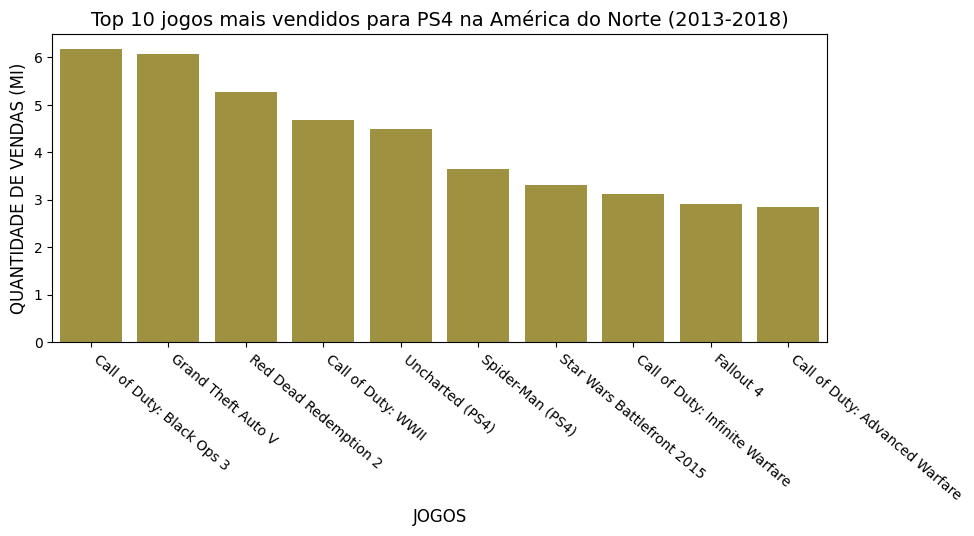

In [29]:
top_dez = top_america_n.head(10)
plt.figure(figsize=(10, 4))
plt.title('Top 10 jogos mais vendidos para PS4 na América do Norte (2013-2018)',  fontsize=14)
sns.barplot(data=top_dez, x='Game', y='North America', estimator=sum, color=paleta_cores[4])
plt.ylabel('QUANTIDADE DE VENDAS (MI)', fontsize=12)
plt.xlabel('JOGOS', fontsize=12)
plt.xticks(rotation=320, ha='left');

## Os 10 jogos mais vendidos na Europa

In [30]:
top_europa = df[['Game', 'Europe']].sort_values(by='Europe', ascending=False, ignore_index=True)
print('Top 10 jogos mais vendidos para PS4 na Europa (2013-2018)')
top_europa.head(10)

Top 10 jogos mais vendidos para PS4 na Europa (2013-2018)


,Game,Europe
0,Grand Theft Auto V,9.71
1,FIFA 18,8.64
2,FIFA 17,7.95
3,Red Dead Redemption 2,6.21
4,Call of Duty: WWII,6.21
5,Call of Duty: Black Ops 3,6.05
6,FIFA 16,5.77
7,FIFA 15,4.49
8,Fallout 4,3.97
9,Uncharted (PS4),3.93


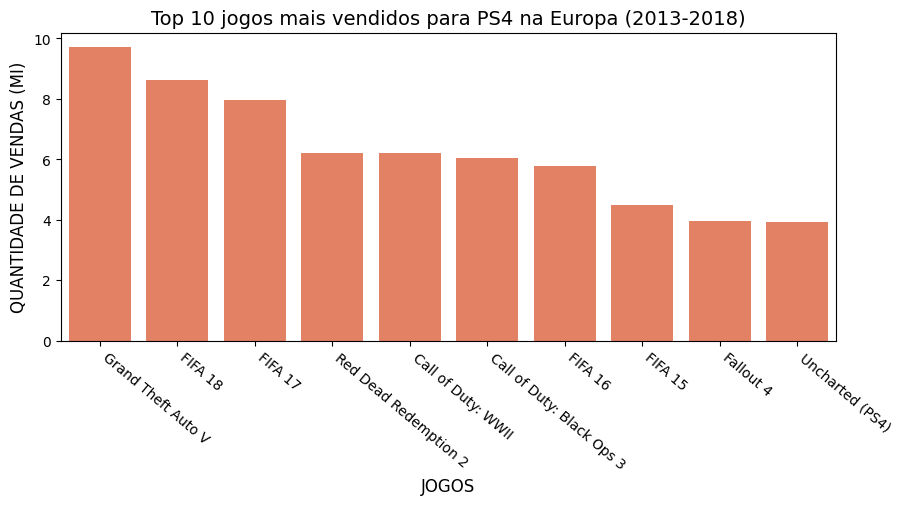

In [31]:
top_dez = top_europa.head(10)
plt.figure(figsize=(10, 4))
plt.title('Top 10 jogos mais vendidos para PS4 na Europa (2013-2018)',  fontsize=14)
sns.barplot(data=top_dez, x='Game', y='Europe', estimator=sum, color=paleta_cores[1])
plt.ylabel('QUANTIDADE DE VENDAS (MI)', fontsize=12)
plt.xlabel('JOGOS', fontsize=12)
plt.xticks(rotation=320, ha='left');

## Os 10 jogos mais vendidos no Japão

In [32]:
top_japao = df[['Game', 'Japan']].sort_values(by='Japan', ascending=False, ignore_index=True)
print('Top 10 jogos mais vendidos para PS4 no Japão (2013-2018)')
top_japao.head(10)

Top 10 jogos mais vendidos para PS4 no Japão (2013-2018)


,Game,Japan
0,Monster Hunter: World,2.17
1,Dragon Quest XI,1.43
2,Final Fantasy XV,1.05
3,Grand Theft Auto V,0.60
4,Metal Gear Solid V: The Phantom Pain,0.50
5,Persona 5,0.48
6,Dark Souls III,0.44
7,Knack,0.42
8,NieR Automata,0.42
9,Resident Evil VII: Biohazard,0.41


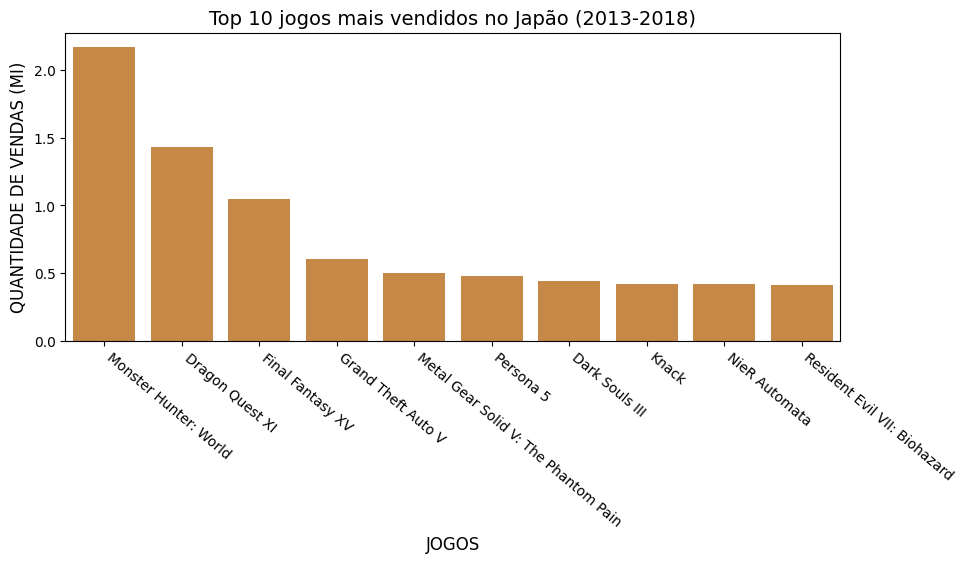

In [33]:
top_dez = top_japao.head(10)
plt.figure(figsize=(10, 4))
plt.title('Top 10 jogos mais vendidos no Japão (2013-2018)', fontsize=14)
sns.barplot(data=top_dez, x='Game', y='Japan', estimator=sum, color=paleta_cores[2])
plt.ylabel('QUANTIDADE DE VENDAS (MI)', fontsize=12)
plt.xlabel('JOGOS', fontsize=12)
plt.xticks(rotation=320, ha='left');

Aqui vale ressaltar que no Japão se diferencia dos outros países, tanto nos jogos, quanto nos gêneros

## Os 10 jogos mais vendidos no resto do mundo

In [34]:
top_mundo = df[['Game', 'Rest of World']].sort_values(by='Rest of World', ascending=False, ignore_index=True)
print('Top 10 jogos mais vendidos para PS4 no resto do mundo (2013-2018)')
top_mundo.head(10)

Top 10 jogos mais vendidos para PS4 no resto do mundo (2013-2018)


,Game,Rest of World
0,Grand Theft Auto V,3.02
1,Call of Duty: Black Ops 3,2.44
2,Red Dead Redemption 2,2.26
3,Call of Duty: WWII,2.12
4,FIFA 18,1.73
5,Uncharted (PS4),1.70
6,FIFA 17,1.61
7,Spider-Man (PS4),1.41
8,Call of Duty: Infinite Warfare,1.36
9,Fallout 4,1.34


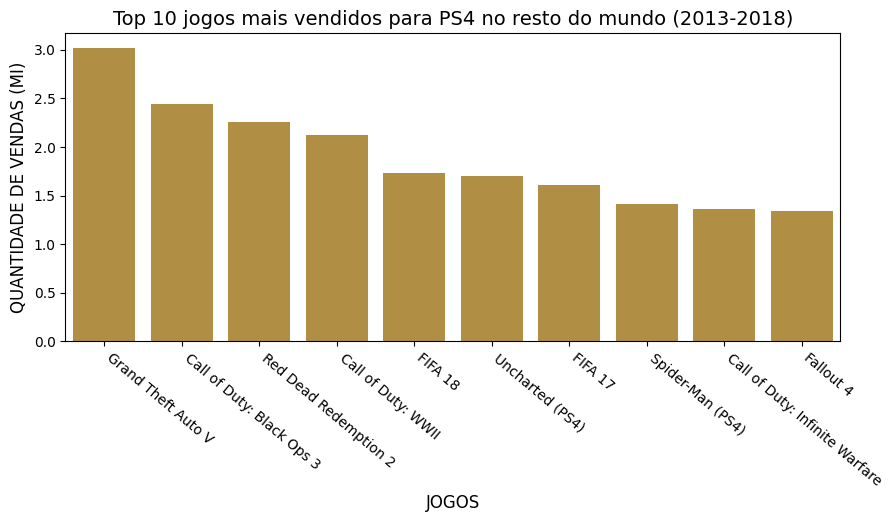

In [35]:
top_dez = top_mundo.head(10)
plt.figure(figsize=(10, 4))
plt.title('Top 10 jogos mais vendidos para PS4 no resto do mundo (2013-2018)', fontsize=14)
sns.barplot(data=top_dez, x='Game', y='Rest of World', estimator=sum, color=paleta_cores[3])
plt.ylabel('QUANTIDADE DE VENDAS (MI)', fontsize=12)
plt.xlabel('JOGOS', fontsize=12)
plt.xticks(rotation=320, ha='left');

# CONCLUSÃO

## A CAMPEÃ 🥇 DAS DESENVOLVEDORAS FOI...

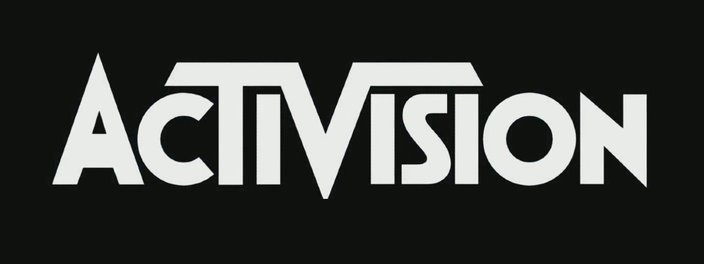

In [36]:
import requests as rq
from PIL import Image
from io import BytesIO

url = 'https://tm.ibxk.com.br/2020/12/30/30130926491100.jpg?ims=704x264'
res = rq.get(url)
img = Image.open(BytesIO(res.content))
img

Seja pela popularidade da franquia Call of Duty, seja pela quantidade de jogos publicados, a Activision ultrapassou a marca de mais de 70 milhões de cópias vendidas.

## O GÊNERO MAIS VENDIDO 🥇 FOI DE...

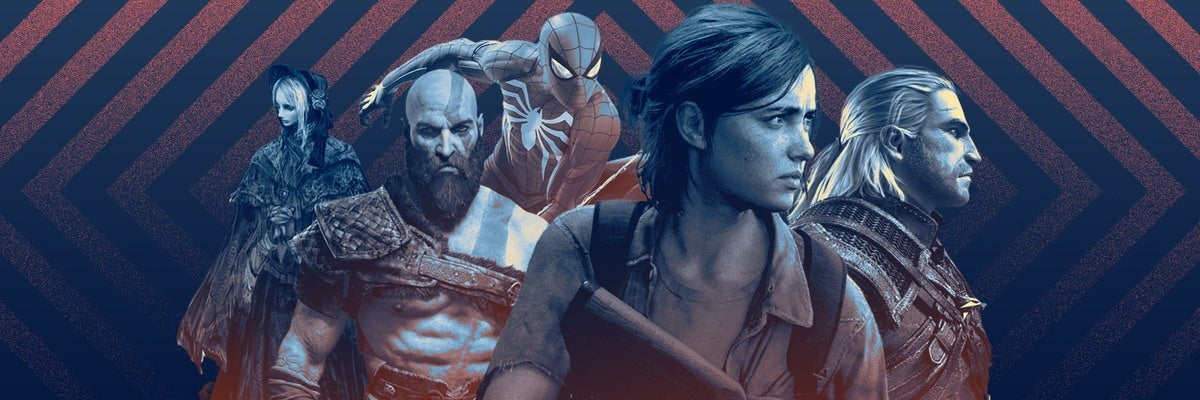

In [37]:
import requests as rq
from PIL import Image
from io import BytesIO

url = 'https://sm.ign.com/t/ign_nordic/lists/2/25-best-ps/25-best-ps4-games-to-play-right-now_yyka.1280.jpg'
res = rq.get(url)
img = Image.open(BytesIO(res.content))
img

Com quase 140 milhões de cópias vendidas, o gênero de **AÇÃO**, foi o mais vendido do console. Maior parte destas vendas se deve a um fenômeno do mundo dos games...

## O CAMPEÃO 🥇 DOS JOGOS...

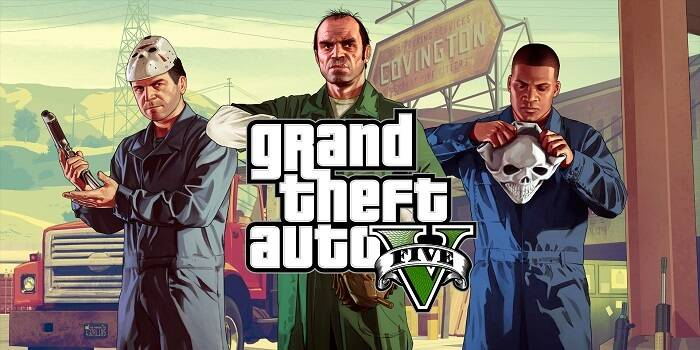

In [38]:
import requests as rq
from PIL import Image
from io import BytesIO

url = 'https://static0.gamerantimages.com/wordpress/wp-content/uploads/GTA-V-Protagonists.jpg?q=50&fit=crop&w=1500&dpr=1.5'
res = rq.get(url)
img = Image.open(BytesIO(res.content))
img

Com quase 20 milhões de cópias vendidas, Grand Theft Auto V (ou GTA V) foi o jogo que mais vendeu cópias no console PS4<br>
Lembrando que esses dados compreendem os anos de 2013-2018

In [39]:
df.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [40]:
df.tail()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
1024,Biomutant,2018,Action,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1026,de Blob,2017,Platform,THQ Nordic,0.0,0.0,0.0,0.0,0.0
1027,Chaos on Deponia,2017,Adventure,Daedalic Entertainment,0.0,0.0,0.0,0.0,0.0
1028,Code Vein,2018,Action,Bandai Namco Entertainment,0.0,0.0,0.0,0.0,0.0
1030,Radial G Racing Revolved,2017,Racing,Tammeka Games,0.0,0.0,0.0,0.0,0.0
